<a href="https://colab.research.google.com/github/UlkuTuncerKucuktas/K9wJZlA0F9ANqa3T/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Preparing Data
2.   Corelation for Variables
3.   Corelation for Events



**Preparing Data**

In [6]:
!unzip /content/drive/MyDrive/transactions.csv.zip

Archive:  /content/drive/MyDrive/transactions.csv.zip
  inflating: transactions.csv        
  inflating: __MACOSX/._transactions.csv  


In [24]:
import numpy as np
import pandas as pd

live_campain = pd.read_csv("/content/drive/MyDrive/live_digital_campaigns.csv")
economic_var =  pd.read_csv("/content/drive/MyDrive/economic_variables.csv")
economic_cal = pd.read_csv("/content/drive/MyDrive/economic_calendar.csv")
transactions = pd.read_csv("/content/transactions.csv")

In [25]:
transactions.head()

,pk,ga_transactionid,ga_datehour,ga_products,ga_channels,ga_itemquantity
0,146288072,2_50414543,2020082900,Product D,Facebook,1
1,146288071,2_50414542,2020082900,Product D,Organic search,1
2,146287503,2_50413935,2020082900,Product D,Organic search,1
3,146287504,2_50413936,2020082900,Product D,Organic search,1
4,146296436,3_65496155,2020082900,Product E,Google Ads,1


In [26]:
transactions["ga_datehour"] = pd.to_datetime(transactions["ga_datehour"], format='%Y%m%d%H')
transactions = transactions.rename(columns={"ga_datehour":"date"})
transactions['date'] = transactions['date'].apply(lambda x: x.date())
transactions.head()

,pk,ga_transactionid,date,ga_products,ga_channels,ga_itemquantity
0,146288072,2_50414543,2020-08-29,Product D,Facebook,1
1,146288071,2_50414542,2020-08-29,Product D,Organic search,1
2,146287503,2_50413935,2020-08-29,Product D,Organic search,1
3,146287504,2_50413936,2020-08-29,Product D,Organic search,1
4,146296436,3_65496155,2020-08-29,Product E,Google Ads,1


In [43]:
transactions_for_economic = transactions[["date","ga_itemquantity"]].groupby("date",as_index=False).sum()
transactions_for_economic["date"] = pd.to_datetime(transactions_for_economic["date"])
transactions_for_economic.head()

,date,ga_itemquantity
0,2020-08-29,33419
1,2020-08-30,37998
2,2020-08-31,50025
3,2020-09-01,66461
4,2020-09-02,54206


In [37]:
economic_var

,date,bist100,usdtry,eurtry,eurusd,faiz,xau,brent
0,2021-04-28,1388.59,8.2159,9.9379,1.2096,18.08,1773.86,67.33
1,2021-04-29,1398.85,8.1710,9.9166,1.2120,18.08,1780.19,67.54
2,2021-04-30,1401.52,8.2281,9.9741,1.2117,18.08,1769.11,68.08
3,2021-05-03,1421.15,8.2649,9.9694,1.2056,17.94,1793.31,67.45
4,2021-05-04,1421.15,8.2888,9.9721,1.2027,17.94,1785.86,67.43
...,...,...,...,...,...,...,...,...
619,2021-10-17,1409.56,9.2595,10.7585,1.1603,18.47,1767.62,84.86
620,2021-10-17,1409.56,9.2595,10.7585,1.1603,18.47,1767.62,84.86
621,2021-10-17,1409.56,9.2595,10.7585,1.1603,18.47,1767.62,84.86
622,2021-10-17,1409.56,9.2595,10.7585,1.1603,18.47,1767.62,84.86


In [38]:
economic_var = economic_var[["date","bist100","usdtry","eurtry","eurusd",
                             "faiz","xau","brent"]]
economic_var['date'] = pd.to_datetime(economic_var['date'], format='%Y-%m-%d')
economic_var.head()

,date,bist100,usdtry,eurtry,eurusd,faiz,xau,brent
0,2021-04-28,1388.59,8.2159,9.9379,1.2096,18.08,1773.86,67.33
1,2021-04-29,1398.85,8.1710,9.9166,1.2120,18.08,1780.19,67.54
2,2021-04-30,1401.52,8.2281,9.9741,1.2117,18.08,1769.11,68.08
3,2021-05-03,1421.15,8.2649,9.9694,1.2056,17.94,1793.31,67.45
4,2021-05-04,1421.15,8.2888,9.9721,1.2027,17.94,1785.86,67.43


In [40]:
economic_var = economic_var.groupby("date",as_index=False).mean()
economic_var.head()

,date,bist100,usdtry,eurtry,eurusd,faiz,xau,brent
0,2021-04-28,1388.590000,8.2159,9.937900,1.2096,18.08,1773.860000,67.330000
1,2021-04-29,1398.850000,8.1710,9.916600,1.2120,18.08,1780.190000,67.540000
2,2021-04-30,1401.520000,8.2281,9.974100,1.2117,18.08,1769.110000,68.080000
3,2021-05-03,1421.150000,8.2649,9.969400,1.2056,17.94,1793.310000,67.450000
4,2021-05-04,1420.996667,8.3091,9.995333,1.2025,17.94,1787.523333,68.113333


In [44]:
mergedf = economic_var.merge(transactions_for_economic, how='inner', on='date')
mergedf.head()

,date,bist100,usdtry,eurtry,eurusd,faiz,xau,brent,ga_itemquantity
0,2021-04-28,1388.590000,8.2159,9.937900,1.2096,18.08,1773.860000,67.330000,49892
1,2021-04-29,1398.850000,8.1710,9.916600,1.2120,18.08,1780.190000,67.540000,36850
2,2021-04-30,1401.520000,8.2281,9.974100,1.2117,18.08,1769.110000,68.080000,46782
3,2021-05-03,1421.150000,8.2649,9.969400,1.2056,17.94,1793.310000,67.450000,63195
4,2021-05-04,1420.996667,8.3091,9.995333,1.2025,17.94,1787.523333,68.113333,65299


**Corelation for Variables**

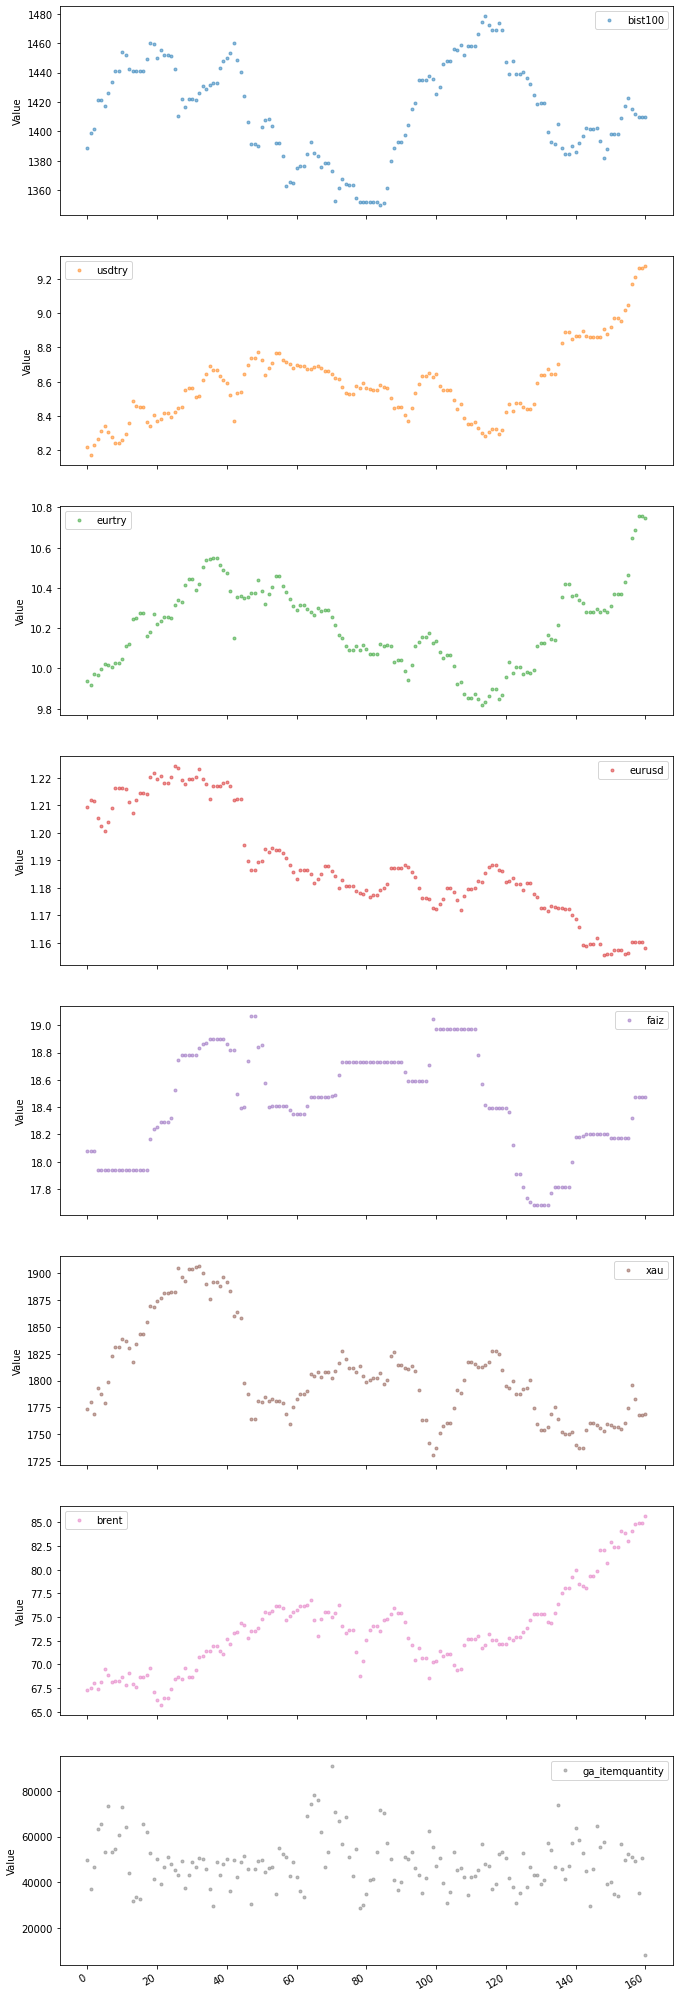

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cols_plot = ["bist100","usdtry","eurtry","eurusd","faiz","xau","brent","ga_itemquantity"]
axes = mergedf[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,40),subplots=True)
for ax in axes:
    ax.set_ylabel('Value')





In [45]:
mergedf.corr()

,bist100,usdtry,eurtry,eurusd,faiz,xau,brent,ga_itemquantity
bist100,1.000000,-0.431980,-0.253688,0.369688,-0.031307,0.352609,-0.411581,-0.174439
usdtry,-0.431980,1.000000,0.765877,-0.612655,-0.001206,-0.445670,0.838320,-0.085861
eurtry,-0.253688,0.765877,1.000000,0.038082,0.078364,0.112850,0.442385,-0.076197
eurusd,0.369688,-0.612655,0.038082,1.000000,0.088523,0.828672,-0.758684,0.029705
faiz,-0.031307,-0.001206,0.078364,0.088523,1.000000,0.282386,-0.138723,-0.124131
xau,0.352609,-0.445670,0.112850,0.828672,0.282386,1.000000,-0.542710,-0.019606
brent,-0.411581,0.838320,0.442385,-0.758684,-0.138723,-0.542710,1.000000,-0.026138
ga_itemquantity,-0.174439,-0.085861,-0.076197,0.029705,-0.124131,-0.019606,-0.026138,1.000000


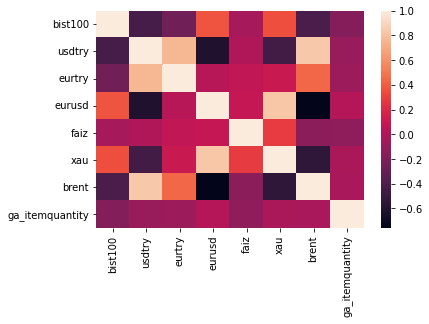

In [52]:
sns.heatmap(mergedf.corr(), 
        xticklabels=mergedf.columns[1:],
        yticklabels=mergedf.columns[1:])

**Preparing Data**

In [54]:
economic_cal.head()

,pk,date,time,country,indicator,priority,explained,expectation,previous
0,1,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Ton),1,NaN,NaN,"1,770MLN"
1,2,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Haftalık),1,NaN,NaN,"%0,5"
2,3,2021-04-26,23:00,ABD,AISI Çelik Üretimi(Yıllık),1,NaN,NaN,"%42,7"
3,4,2021-04-26,23:00,ABD,AISI Çelik Üretimi Kapasite Kullanımı,1,NaN,NaN,"%78,0"
4,5,2021-04-26,23:00,ABD,Perakende Benzin Fiyatları($/Galon),1,NaN,NaN,2.855


In [61]:
economic_cal = economic_cal[["date","priority"]]
economic_cal['date'] = pd.to_datetime(economic_cal['date'], format='%Y-%m-%d')
economic_cal.head()

,date,priority
0,2021-04-26,1
1,2021-04-26,1
2,2021-04-26,1
3,2021-04-26,1
4,2021-04-26,1


In [62]:
economic_cal_sum = economic_cal.groupby("date",as_index=False).sum()
economic_cal_mean = economic_cal.groupby("date",as_index=False).mean()



In [68]:
mergedf2 = economic_cal_sum.merge(economic_cal_mean, how='inner', on='date')
mergedf2 = mergedf2.merge(transactions_for_economic, how='inner', on='date')
mergedf2 = mergedf2.rename(columns={"priority_x":"sum","priority_y":"mean"})
mergedf2.head()

,date,sum,mean,ga_itemquantity
0,2021-04-26,258,1.767123,61005
1,2021-04-28,547,1.860544,49892
2,2021-04-29,559,2.047619,36850
3,2021-04-30,807,2.079897,46782
4,2021-05-03,313,2.100671,63195


**Corelation For Events**

Results show that sum of events more important than mean priority for that day. 

In [72]:
mergedf2.corr()

,sum,mean,ga_itemquantity
sum,1.000000,0.203452,0.269961
mean,0.203452,1.000000,0.022960
ga_itemquantity,0.269961,0.022960,1.000000


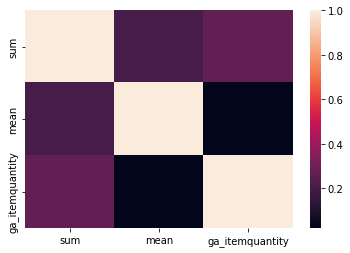

In [73]:
sns.heatmap(mergedf2.corr(), 
        xticklabels=mergedf2.columns[1:],
        yticklabels=mergedf2.columns[1:])